In [1]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import os
import matplotlib.pyplot as plt
import torch.nn.functional as F
%matplotlib inline
import random
import torchvision
import torchvision.transforms as transforms
import numpy as np
from torchvision import models
import matplotlib.pyplot as plt


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device available now:', device)

image_transforms = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
train = torchvision.datasets.CIFAR10(root='./', train=True, download=True, transform=image_transforms)
test = torchvision.datasets.CIFAR10(root='./', train=False, transform=image_transforms)

listsubtrain = list(range(0, len(train), 500))

listest = list(range(1, len(test), 20))
trainset_1 = torch.utils.data.Subset(train, listsubtrain)
trainset_2 = torch.utils.data.Subset(test, listest)



traindata = torch.utils.data.DataLoader(trainset_1,batch_size=20, shuffle=True, num_workers=2,pin_memory=True)

testdata = torch.utils.data.DataLoader(trainset_2,batch_size=5, shuffle=False, num_workers=2,pin_memory=True)

transform_inception = transforms.Resize((299,299))


model = models.inception_v3()
model.aux_logits = False
if torch.cuda.is_available():
    model.cuda()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01, weight_decay = 0.005, momentum = 0.9)
criterion = nn.CrossEntropyLoss().to(device)
def train_test(epochs):
 list_acc = 0
 for i in range(epochs):
  Loss = 0
  num_correct=0
  tot = 0
  model.train()
  for i,data in enumerate(traindata):
    x_data = data[0].to(device)
    labels = data[1].to(device)
    optimizer.zero_grad()
    outputs = model(x_data)

    _, pred = torch.max(outputs.data, 1)
    num_correct += (pred == labels).sum().item()
    tot += labels.size(0)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    Loss += loss
    
  list_acc += num_correct/tot
  

 num_correct = 0
 tot = 0
 for i,data in enumerate(testdata):
    x_data = data[0].to(device)
    labels = data[1].to(device)
    outputs = model(x_data)
   
    _, pred = torch.max(outputs.data, 1)
    num_correct += (pred == labels).sum().item()
    tot += labels.size(0)
 return (num_correct)/tot , list_acc/epochs
 

Device available now: cuda


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to ./


/usr/local/lib/python3.8/dist-packages/torchvision/models/inception.py:43: FutureWarning: The default weight initialization of inception_v3 will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(


In [5]:
def train_test1(epochs):
 list_acc = 0
 optimizer = torch.optim.RMSprop(model.parameters(),lr=0.01, weight_decay = 0.005, momentum = 0.9)
 for i in range(epochs):
  Loss = 0
  num_correct=0
  tot = 0
  model.train()
  for i,data in enumerate(traindata):
    x_data = data[0].to(device)
    labels = data[1].to(device)
    optimizer.zero_grad()
    outputs = model(x_data)

    _, pred = torch.max(outputs.data, 1)
    num_correct += (pred == labels).sum().item()
    tot += labels.size(0)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    Loss += loss
    
  list_acc += num_correct/tot
  

 num_correct = 0
 tot = 0
 for i,data in enumerate(testdata):
    x_data = data[0].to(device)
    labels = data[1].to(device)
    outputs = model(x_data)
   
    _, pred = torch.max(outputs.data, 1)
    num_correct += (pred == labels).sum().item()
    tot += labels.size(0)
 return (num_correct)/tot , list_acc/epochs

In [6]:
list_x = [i+1 for i in range(10)]
list_test = []
list_train = []
for i in list_x:
  a,b = train_test(i)
  print(a,b)
  list_test.append(a)
  list_train.append(b)
     
list_test_nosgd = []
list_train_nosgd  = []
for i in list_x:
  a,b = train_test1(i)
  print(a,b)
  list_test_nosgd.append(a)
  list_train_nosgd.append(b)
     


0.206 1.0
0.194 0.99
0.196 0.9899999999999999
0.19 0.9725
0.204 0.968
0.19 0.975
0.192 0.9757142857142858
0.178 0.98875
0.216 0.9922222222222222
0.206 0.9960000000000001
0.094 0.3
0.104 0.08499999999999999
0.108 0.10666666666666667
0.11 0.0975
0.098 0.12
0.094 0.11333333333333333
0.136 0.11857142857142858
0.102 0.12250000000000001
0.118 0.09555555555555555
0.084 0.10200000000000001


Text(0.5, 0, 'Test_accuracy with and without sgd')

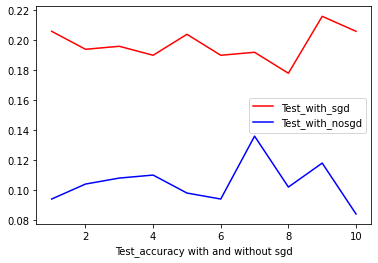

In [11]:
plt.plot(list_x,list_test,color = 'red')
plt.plot(list_x,list_test_nosgd,color = 'blue')
plt.legend(['Test_with_sgd','Test_with_nosgd'])
plt.xlabel('Test_accuracy with and without sgd')
